In [1]:
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv('Agmarknet_Price_And_Arrival_Report_MP.csv')
data

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Madhya Pradesh,Alirajpur,Alirajpur,147 Average,Cereals,12.5,1400.0,1500.0,1450.0,18-May-18
1,Madhya Pradesh,Alirajpur,Alirajpur,147 Average,Cereals,15,1500.0,1550.0,1525.0,29-Jan-18
2,Madhya Pradesh,Alirajpur,Alirajpur,147 Average,Cereals,25,1600.0,1735.0,1735.0,18-Apr-18
3,Madhya Pradesh,Alirajpur,Alirajpur,147 Average,Cereals,25.4,1500.0,1550.0,1525.0,28-Jan-18
4,Madhya Pradesh,Alirajpur,Alirajpur,147 Average,Cereals,36.7,1500.0,1550.0,1525.0,10-Mar-18
...,...,...,...,...,...,...,...,...,...,...
46222,Madhya Pradesh,Vidisha,Vidisha,Lokwan,Cereals,232,1830.0,2460.0,2180.0,16-Nov-18
46223,Madhya Pradesh,Vidisha,Vidisha,Sharbati,Cereals,90,2460.0,3000.0,2600.0,20-Jul-18
46224,Madhya Pradesh,Vidisha,Vidisha,Sharbati,Cereals,139,2460.0,3101.0,2800.0,12-Sep-18
46225,Madhya Pradesh,Vidisha,Vidisha,Sharbati,Cereals,202,2350.0,3040.0,2750.0,14-Nov-18


In [52]:
# convert the column Arrivals (Tonnes) to float
data['Arrivals (Tonnes)'] = data['Arrivals (Tonnes)'].str.replace(',', '').astype(float)


In [15]:
data['District Name'].unique()

array(['Alirajpur', 'Anupur', 'Ashoknagar', 'Badwani', 'Balaghat',
       'Betul', 'Bhind', 'Bhopal', 'Burhanpur', 'Chhatarpur',
       'Chhindwara', 'Damoh', 'Datia', 'Dewas', 'Dhar', 'Dindori', 'Guna',
       'Gwalior', 'Harda', 'Hoshangabad', 'Indore', 'Jabalpur', 'Jhabua',
       'Katni', 'Khandwa', 'Khargone', 'Mandla', 'Mandsaur', 'Morena',
       'Narsinghpur', 'Neemuch', 'Panna', 'Raisen', 'Rajgarh', 'Ratlam',
       'Rewa', 'Sagar', 'Satna', 'Sehore', 'Seoni', 'Shajapur', 'Shehdol',
       'Sheopur', 'Shivpuri', 'Sidhi', 'Singroli', 'Tikamgarh', 'Ujjain',
       'Umariya', 'Vidisha'], dtype=object)

In [9]:
len(data['Reported Date'].unique())

366

In [13]:
data_wh = pd.read_csv('Registered Warehouses - WDRA (1).csv')
data_wh

,WHM Name,WH Name,WH ID,Address,District,State,Capacity(in MT),Registration Date,Registration Valid Upto,Contact No.,Status,Remarks
0,Aarti Agrawal,Aarya Warehouse,6915300,"Survey No : 85/1, 86, patwari Halka No 105, Gr...",Rajgarh,MADHYA PRADESH,4005,18-Apr-2024,17-Jan-2029,9340991496,Active,NaN
1,Aarti Kabra,Shri Ram Warehouse,6638829,"INFRANT OF KRASHI UPAJ MANDI, MAIN ROAD SHOBHAPUR",Hoshangabad,MADHYA PRADESH,4150,06-Oct-2022,05-Oct-2027,9893625074,Active,NaN
2,Aarti Pandey,Aarti Warehouse,6737738,"Village Ankhmau,",Hoshangabad,MADHYA PRADESH,3776,15-Jun-2023,14-Jun-2028,9425006848,Active,NaN
3,AARTI RAGHUWANSHI,SHIV WAREHOUSE,6778237,"VILLAGE-LUKWASA,",Shivpuri,MADHYA PRADESH,5691,30-Aug-2023,29-Aug-2028,9424020322,Inactive,EXPIRED/INSUFFICIENT INSURANCE
4,Aarti Samaiya,M/s Ajayraj Warehousings,6922231,"Khasra No. 117/3/2, 117/4/3, 118/1/2, Village ...",Raisen,MADHYA PRADESH,4824,26-Apr-2024,25-Apr-2029,9406565527,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2758,Youshovardhini Saxena,Chitransh Warehouse,6719645,"Abhaypur Road, Village : Kataria Khedi,,",Rajgarh,MADHYA PRADESH,10000,24-May-2023,23-May-2028,9329153083,Active,NaN
2759,YUSUF KHAN,New Daroga Warehouse,6991897,"Village Layara, Layara",Vidisha,MADHYA PRADESH,2000,06-Nov-2024,05-Nov-2029,9753034798,Active,NaN
2760,Yuvika Sahu,KPS Warehousing,6750517,"Post - Sarkhedi,",Sagar,MADHYA PRADESH,4863,30-Jun-2023,29-Jun-2028,7000448538,Active,NaN
2761,Zeba Iftekhar,Lotus Warehouse,6734131,"Gram Kadaiya Kalan,",Bhopal,MADHYA PRADESH,5607,12-Jun-2023,11-Jun-2028,9300653380,Active,NaN


In [14]:
data_wh = data_wh[data_wh['Status'] == 'Active']
data_wh.reset_index(drop=True, inplace=True)
data_wh

,WHM Name,WH Name,WH ID,Address,District,State,Capacity(in MT),Registration Date,Registration Valid Upto,Contact No.,Status,Remarks
0,Aarti Agrawal,Aarya Warehouse,6915300,"Survey No : 85/1, 86, patwari Halka No 105, Gr...",Rajgarh,MADHYA PRADESH,4005,18-Apr-2024,17-Jan-2029,9340991496,Active,NaN
1,Aarti Kabra,Shri Ram Warehouse,6638829,"INFRANT OF KRASHI UPAJ MANDI, MAIN ROAD SHOBHAPUR",Hoshangabad,MADHYA PRADESH,4150,06-Oct-2022,05-Oct-2027,9893625074,Active,NaN
2,Aarti Pandey,Aarti Warehouse,6737738,"Village Ankhmau,",Hoshangabad,MADHYA PRADESH,3776,15-Jun-2023,14-Jun-2028,9425006848,Active,NaN
3,Aarti Samaiya,M/s Ajayraj Warehousings,6922231,"Khasra No. 117/3/2, 117/4/3, 118/1/2, Village ...",Raisen,MADHYA PRADESH,4824,26-Apr-2024,25-Apr-2029,9406565527,Active,NaN
4,AARTI SONI,SHRI JEE WAREHOUSE,6923312,"KH NO 273/13 VILL PIPALIYA, TEHSIL BUDHNI",Sehore,MADHYA PRADESH,4976,02-May-2024,01-May-2029,9827081512,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2723,Youshovardhini Saxena,Chitransh Warehouse,6719645,"Abhaypur Road, Village : Kataria Khedi,,",Rajgarh,MADHYA PRADESH,10000,24-May-2023,23-May-2028,9329153083,Active,NaN
2724,YUSUF KHAN,New Daroga Warehouse,6991897,"Village Layara, Layara",Vidisha,MADHYA PRADESH,2000,06-Nov-2024,05-Nov-2029,9753034798,Active,NaN
2725,Yuvika Sahu,KPS Warehousing,6750517,"Post - Sarkhedi,",Sagar,MADHYA PRADESH,4863,30-Jun-2023,29-Jun-2028,7000448538,Active,NaN
2726,Zeba Iftekhar,Lotus Warehouse,6734131,"Gram Kadaiya Kalan,",Bhopal,MADHYA PRADESH,5607,12-Jun-2023,11-Jun-2028,9300653380,Active,NaN


In [17]:
data_wh['District'].unique()

array(['Rajgarh', 'Hoshangabad', 'Raisen', 'Sehore', 'Rewa', 'Vidisha',
       'Shajapur', 'Mandla', 'Seoni', 'Sagar', 'Satna', 'Betul',
       'Jabalpur', 'Harda', 'Bhopal', 'Panna', 'Shahdol', 'Dindori',
       'Dewas', 'Chhatarpur', 'Tikamgarh', 'East Nimar', 'West Nimar',
       'Katni', 'Mandsaur', 'Narsimhapur', 'Ashoknagar', 'Chhindwara',
       'Indore', 'Ujjain', 'Damoh', 'Gwalior', 'Morena', 'Guna',
       'Balaghat', 'Singrauli', 'Sidhi', 'Umaria', 'Bhind', 'Shivpuri',
       'Datia', 'Sheopur', 'Dhar', 'Burhanpur', 'Ratlam', 'Neemuch',
       'Barwani', 'Alirajpur', 'Anuppur', 'Jhabua'], dtype=object)

In [41]:
# create a new data frame which has the district names and the number of warehouses in each district and the total capacity of the warehouses in each district
districts = data_wh['District'].unique()
districts = pd.DataFrame(districts, columns=['District'])
districts['No of Warehouses'] = 0
districts['Arrivals'] = 0
districts['Total Capacity'] = 0
districts['Price'] = 0
districts

,District,No of Warehouses,Arrivals,Total Capacity,Price
0,Rajgarh,0,0,0,0
1,Hoshangabad,0,0,0,0
2,Raisen,0,0,0,0
3,Sehore,0,0,0,0
4,Rewa,0,0,0,0
5,Vidisha,0,0,0,0
6,Shajapur,0,0,0,0
7,Mandla,0,0,0,0
8,Seoni,0,0,0,0
9,Sagar,0,0,0,0


In [42]:
for i in range(len(data_wh)):
    district = data_wh['District'][i]
    index = districts[districts['District'] == district].index[0]
    districts['No of Warehouses'][index] += 1
    districts['Total Capacity'][index] += data_wh['Capacity(in MT)'][i]
districts

C:\Users\vibhu\AppData\Local\Temp\ipykernel_8448\3067239591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['No of Warehouses'][index] += 1
C:\Users\vibhu\AppData\Local\Temp\ipykernel_8448\3067239591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['Total Capacity'][index] += data_wh['Capacity(in MT)'][i]


,District,No of Warehouses,Arrivals,Total Capacity,Price
0,Rajgarh,94,0,468777,0
1,Hoshangabad,348,0,1931362,0
2,Raisen,249,0,1357721,0
3,Sehore,234,0,1105799,0
4,Rewa,41,0,274388,0
5,Vidisha,226,0,1167381,0
6,Shajapur,81,0,395532,0
7,Mandla,20,0,98996,0
8,Seoni,115,0,724859,0
9,Sagar,70,0,355595,0


In [67]:
data['District Name'].replace('Umariya', 'Umaria', inplace=True)

In [69]:
# fill the Arrivals column and Price column in a similar way from data df
for i in range(len(data)):
    district = data['District Name'][i]
    index = districts[districts['District'] == district].index[0]
    districts['Arrivals'][index] += data['Arrivals (Tonnes)'][i]
    districts['Price'][index]+=data['Modal Price (Rs./Quintal)'][i]
districts

C:\Users\vibhu\AppData\Local\Temp\ipykernel_8448\754766947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['Arrivals'][index] += data['Arrivals (Tonnes)'][i]
C:\Users\vibhu\AppData\Local\Temp\ipykernel_8448\754766947.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['Price'][index]+=data['Modal Price (Rs./Quintal)'][i]


,District,No of Warehouses,Arrivals,Total Capacity,Price
0,Rajgarh,94,372505.83,468777,6801491.00
1,Hoshangabad,348,1796928.28,1931362,5266188.00
2,Raisen,249,516787.22,1357721,5097454.00
3,Sehore,234,1023693.86,1105799,6773871.00
4,Rewa,41,414089.84,274388,3616609.00
5,Vidisha,226,1063811.90,1167381,6205932.00
6,Shajapur,81,536996.02,395532,8559831.00
7,Mandla,20,470682.38,98996,2534336.00
8,Seoni,115,331267.05,724859,1989864.00
9,Sagar,70,1022431.18,355595,8807358.00


In [115]:
data_irrigation = pd.read_csv('source_irrigated_area_report_MP.csv')
data_irrigation.reset_index(drop=True, inplace=True)
data_irrigation

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2,Alirajpur,2033,-,2033,4766,2851,17808,20659,9725,37183,2033,-,2033,4766,2878,18115,20993,9725,37517
1,3,Anuppur,557,-,557,66,2353,1613,3966,1611,6200,557,-,557,66,2353,1613,3966,1611,6200
2,4,Ashoknagar,11361,-,11361,7070,167338,33675,201013,42800,262244,11361,-,11361,7070,167338,33675,201013,42800,262244
3,5,Balaghat,82336,-,82336,20646,7923,19977,27900,12269,143151,98852,-,98852,23338,11971,27219,39190,12269,173649
4,6,Barwani,18484,-,18484,1705,40709,70324,111033,40384,171606,18484,-,18484,1705,40709,70324,111033,40384,171606
5,7,Betul,21082,-,21082,10162,62395,96776,159171,21680,212095,21082,-,21082,10162,62395,96776,159171,21680,212095
6,8,Bhind,76738,-,76738,1271,129218,52427,181645,382,260036,83658,-,83658,1271,137685,56279,193964,382,279275
7,9,Bhopal,12450,-,12450,3940,63380,32400,95780,29463,141633,12450,-,12450,3940,63380,32400,95780,29463,141633
8,10,Burhanpur,852,-,852,304,33137,32688,65825,4420,71401,852,-,852,304,47560,32688,80248,4420,85824
9,11,Chhatarpur,23846,-,23846,3481,83683,214035,297718,13480,338525,23846,-,23846,3481,83683,214035,297718,13480,338525


In [116]:
mean = data_irrigation['11'].mean()

In [117]:
data_irrigation['2'].replace('Khargone', 'West Nimar', inplace=True)
data_irrigation['2'].replace('Khandwa', 'East Nimar', inplace=True)
data_irrigation['2'].replace('Narsinghpur', 'Narsimhapur', inplace=True)
data_irrigation['2'].replace('Seoni / Shivani', 'Seoni', inplace=True)

In [118]:
districts['Irrigation'] = 0
for i in range(len(data_irrigation)):
    district = data_irrigation['2'][i]
    print(district)
    index = districts[districts['District'] == district].index[0]
    districts['Irrigation'][index] = data_irrigation['11'][i]
districts

Alirajpur
Anuppur
Ashoknagar
Balaghat
Barwani
Betul
Bhind
Bhopal
Burhanpur
Chhatarpur
Chhindwara
Damoh
Datia
Dewas
Dhar
Dindori
Guna
Gwalior
Harda
Hoshangabad
Indore
Jabalpur
Jhabua
Katni
East Nimar
West Nimar
Mandla
Mandsaur
Morena
Narsimhapur
Neemuch
Panna
Raisen
Rajgarh
Ratlam
Rewa
Sagar
Satna
Sehore
Seoni
Shahdol
Shajapur
Sheopur
Shivpuri
Sidhi
Singrauli
Tikamgarh
Ujjain
Umaria
Vidisha


C:\Users\vibhu\AppData\Local\Temp\ipykernel_8448\3015997583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['Irrigation'][index] = data_irrigation['11'][i]


,District,No of Warehouses,Arrivals,Total Capacity,Price,Irrigation
0,Rajgarh,94,372505.83,468777,6801491.00,380321
1,Hoshangabad,348,1796928.28,1931362,5266188.00,186604
2,Raisen,249,516787.22,1357721,5097454.00,507196
3,Sehore,234,1023693.86,1105799,6773871.00,363507
4,Rewa,41,414089.84,274388,3616609.00,164181
5,Vidisha,226,1063811.90,1167381,6205932.00,466309
6,Shajapur,81,536996.02,395532,8559831.00,260311
7,Mandla,20,470682.38,98996,2534336.00,64914
8,Seoni,115,331267.05,724859,1989864.00,129393
9,Sagar,70,1022431.18,355595,8807358.00,405957


In [164]:
districts['empty space'] = districts['Total Capacity'] - districts['Arrivals']
districts

,District,No of Warehouses,Arrivals,Total Capacity,Price,Irrigation,empty space
0,Rajgarh,94,372505.83,468777,6801491.00,380321,96271.17
1,Hoshangabad,348,1796928.28,1931362,5266188.00,186604,134433.72
2,Raisen,249,516787.22,1357721,5097454.00,507196,840933.78
3,Sehore,234,1023693.86,1105799,6773871.00,363507,82105.14
4,Rewa,41,414089.84,274388,3616609.00,164181,-139701.84
5,Vidisha,226,1063811.90,1167381,6205932.00,466309,103569.10
6,Shajapur,81,536996.02,395532,8559831.00,260311,-141464.02
7,Mandla,20,470682.38,98996,2534336.00,64914,-371686.38
8,Seoni,115,331267.05,724859,1989864.00,129393,393591.95
9,Sagar,70,1022431.18,355595,8807358.00,405957,-666836.18


In [182]:
districts.to_csv('districts.csv', index=False)

In [120]:
# we can replace the 0 values in the Irrigation column with the mean value of the column

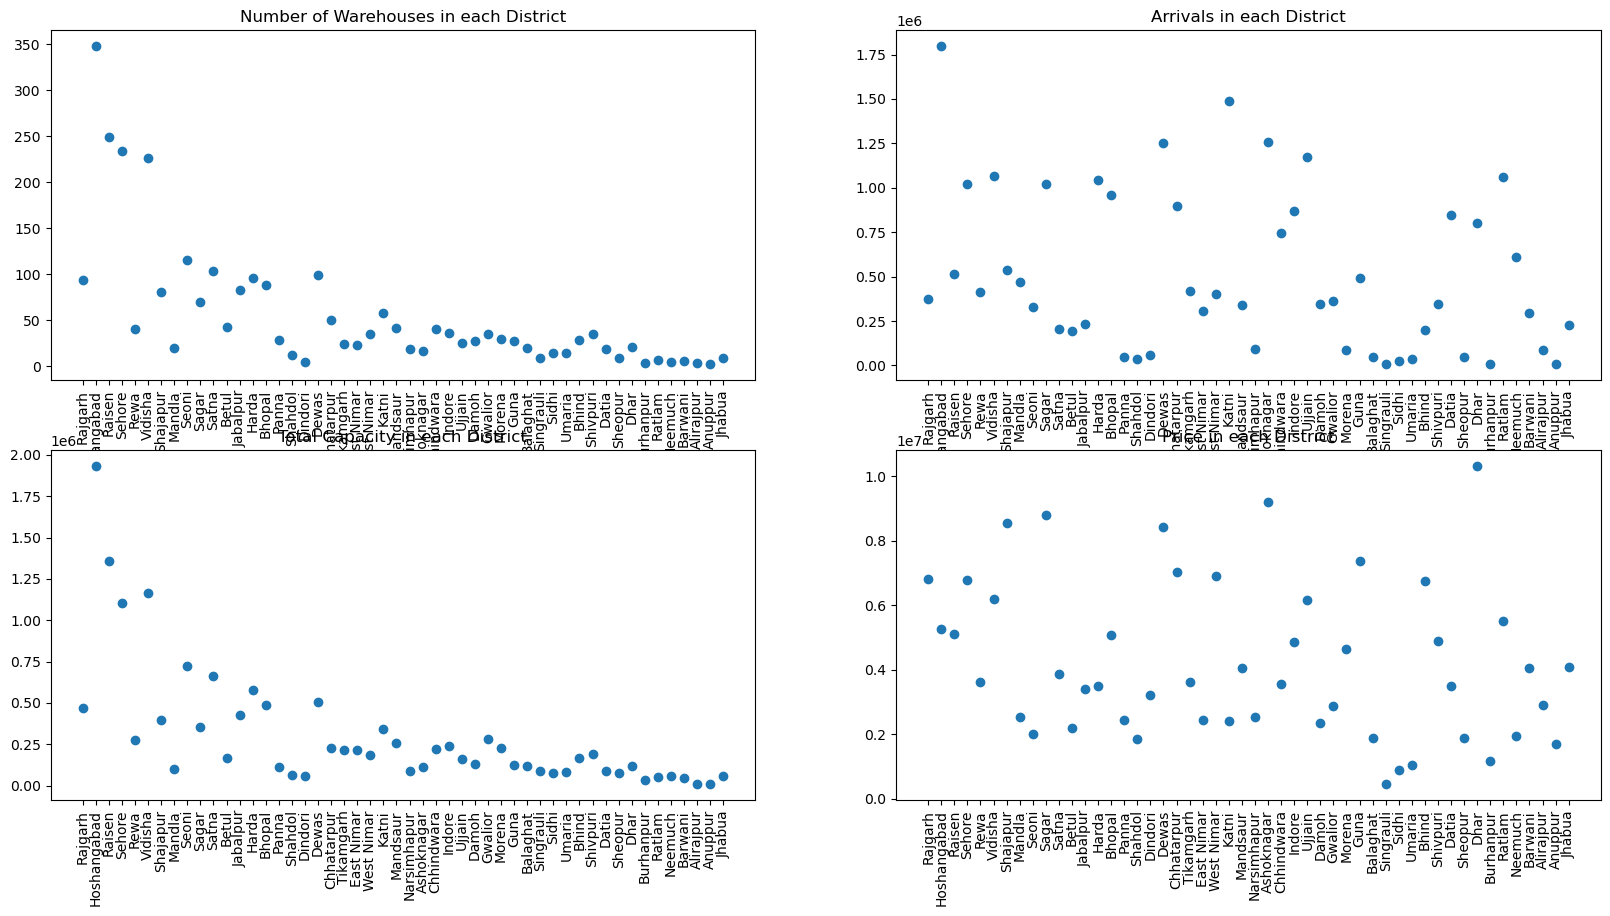

In [121]:
# plot the data with districts on x-axis and the rest of variables in each district on y-axis in a different plots in a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.scatter(districts['District'], districts['No of Warehouses'])
plt.xticks(rotation=90)
plt.title('Number of Warehouses in each District')

plt.subplot(2, 2, 2)
plt.scatter(districts['District'], districts['Arrivals'])
plt.xticks(rotation=90)
plt.title('Arrivals in each District')

plt.subplot(2, 2, 3)
plt.scatter(districts['District'], districts['Total Capacity'])
plt.xticks(rotation=90)
plt.title('Total Capacity in each District')

plt.subplot(2, 2, 4)
plt.scatter(districts['District'], districts['Price'])
plt.xticks(rotation=90)
plt.title('Price in each District')

plt.show()



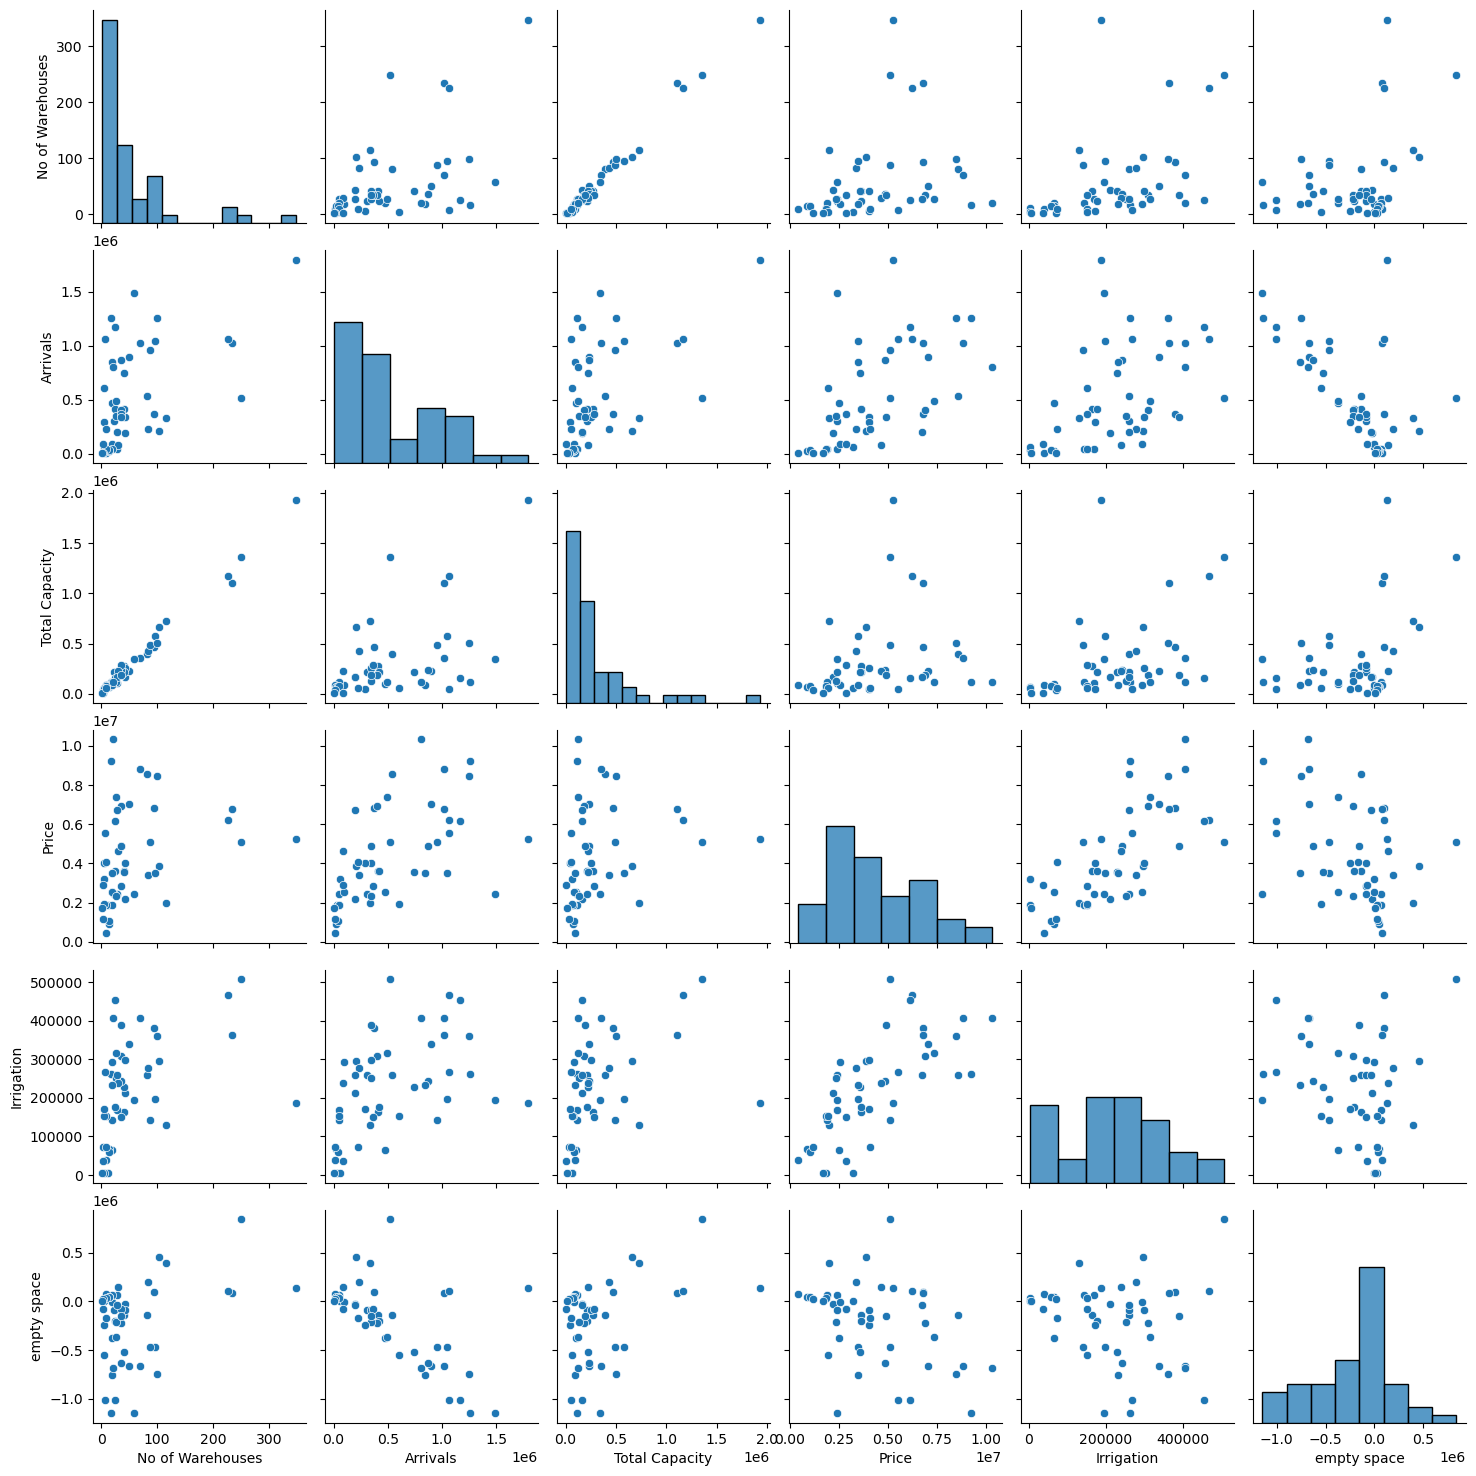

In [165]:
sns.pairplot(districts)

In [166]:
# create a random forest model to predict the price of wheat in each district
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = districts[[ 'Arrivals', 'Irrigation', 'No of Warehouses', 'Total Capacity']]
y = districts['Price']

In [167]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [169]:
#print the accuracy of the model


print(model.score(X_test, y_test))
mean_squared_error(y_test, y_pred)

0.5254029585070739


2499850191465.3545